100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 255GB/s]
2025-07-22 22:08:51.900891671 [E:onnxruntime:Default, provider_bridge_ort.cc:2195 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1778 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcudnn.so.9: cannot open shared object file: No such file or directory



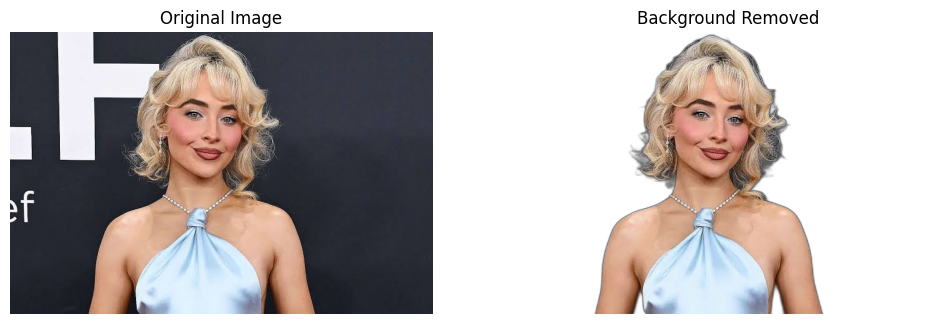

✅ Image saved to output_sab.png


In [1]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import io

# 3️⃣ Load input image (change this path or upload your own image)
input_path = 'sabrina carpintero2.png'  # Replace with your image path

# Load image
input_image = Image.open(input_path).convert("RGBA")

# 4️⃣ Remove background
output_image = remove(input_image)

# 5️⃣ Display input and output
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(input_image)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(output_image)
axs[1].set_title("Background Removed")
axs[1].axis('off')

plt.show()

# 6️⃣ Save the result
output_path = 'output_sab.png'
output_image.save(output_path)
print(f"✅ Image saved to {output_path}")

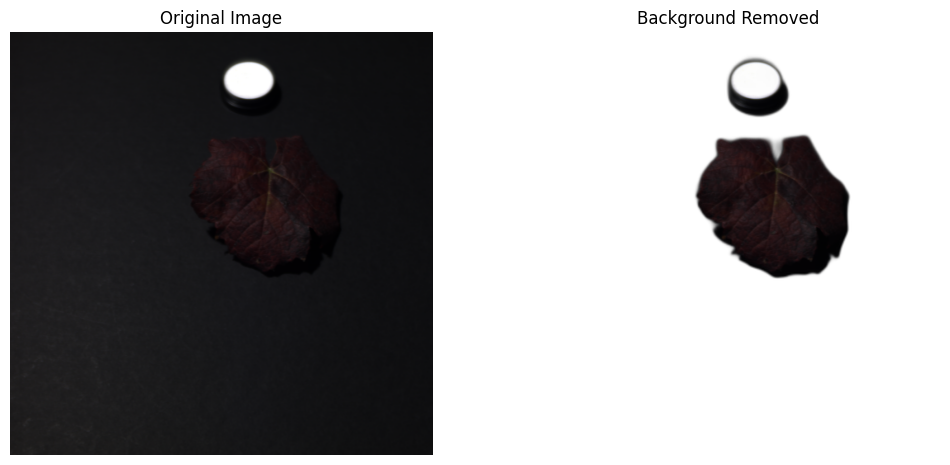

✅ Image saved to output_planta.png


In [16]:
input_path = '/home/dylanjitton/plant_disease/Dataset/Data/2020-09-10_004/results/REFLECTANCE_2020-09-10_004.png'  # Replace with your image path

# Load image
input_image = Image.open(input_path).convert("RGBA")

# 4️⃣ Remove background
output_image = remove(input_image)

# 5️⃣ Display input and output
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(input_image)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(output_image)
axs[1].set_title("Background Removed")
axs[1].axis('off')

plt.show()

# 6️⃣ Save the result
output_path = 'output_planta.png'
output_image.save(output_path)
print(f"✅ Image saved to {output_path}")

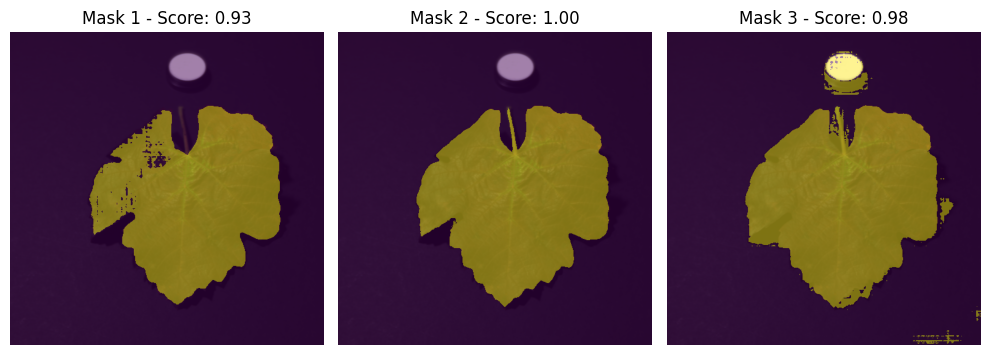

In [11]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# Load model
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

# Load image
image_path = "/home/dylanjitton/plant_disease/planta.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor = SamPredictor(sam)
predictor.set_image(image)

# Example manual point (you can change this)
input_point = np.array([[300, 300]])  # x, y
input_label = np.array([1])

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# Show result
plt.figure(figsize=(10, 10))
for i, mask in enumerate(masks):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.title(f"Mask {i+1} - Score: {scores[i]:.2f}")
    plt.axis("off")
plt.tight_layout()
plt.show()



In [13]:
from PIL import Image

# Choose mask index 1 (mask 2)
mask_index = 1
mask = masks[mask_index]

# Ensure mask is uint8 format (0 or 255)
mask_uint8 = (mask * 255).astype(np.uint8)

# Apply mask to the original image (keep RGB)
masked_image = image.copy()
masked_image[mask == 0] = 0  # Set background to black

# Convert to RGBA and set alpha channel from the mask
rgba_image = np.dstack((masked_image, mask_uint8))  # (H, W, 4)

# Save with transparency
output_path = "cut_leaf_mask2.png"
Image.fromarray(rgba_image).save(output_path)
print(f"Saved cut image with transparency: {output_path}")


Saved cut image with transparency: cut_leaf_mask2.png


In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from segment_anything import SamPredictor

def maskHoja(image_path, name):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 💡 Cut off the top 20% of the image
    height = image.shape[0]
    crop_top = int(height * 0.2)
    image = image[crop_top:, :]  # Crop from 20% to bottom

    predictor = SamPredictor(sam)
    predictor.set_image(image)

    # 📌 Adjust input point relative to cropped image
    input_point = np.array([[300, 300 - crop_top]])  # Adjust Y coord
    input_label = np.array([1])

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Optional: Visualize the 3 predicted masks
    plt.figure(figsize=(10, 10))
    for i, mask in enumerate(masks):
        plt.subplot(1, 3, i + 1)
        plt.imshow(image)
        plt.imshow(mask, alpha=0.5)
        plt.title(f"Mask {i+1} - Score: {scores[i]:.2f}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Choose mask index 1 (mask 2)
    mask_index = 1
    mask = masks[mask_index]

    # Convert mask to uint8 (0 or 255)
    mask_uint8 = (mask * 255).astype(np.uint8)

    # Apply mask to the RGB image
    masked_image = image.copy()
    masked_image[mask == 0] = 0

    # Add alpha channel (transparency)
    rgba_image = np.dstack((masked_image, mask_uint8))

    # Save the result as PNG
    output_path = f"{name}.png"
    Image.fromarray(rgba_image).save(output_path)
    print(f"✅ Saved cut image with transparency: {output_path}")



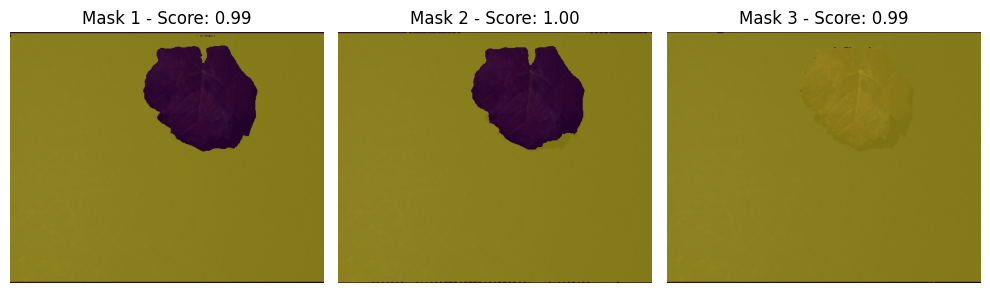

✅ Saved cut image with transparency: hojaMask2.png


In [40]:
maskHoja('/home/dylanjitton/plant_disease/Dataset/Data/2020-09-10_004/results/REFLECTANCE_2020-09-10_004.png','hojaMask2')

In [17]:
def maskHoja2(img_path,name):
    # Load image
    input_image = Image.open(img_path).convert("RGBA")

    # 4️⃣ Remove background
    output_image = remove(input_image)

    # 5️⃣ Display input and output
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(input_image)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(output_image)
    axs[1].set_title("Background Removed")
    axs[1].axis('off')

    plt.show()

    # 6️⃣ Save the result
    output_path = f'{name}.png'
    output_image.save(output_path)
    print(f"✅ Image saved to {output_path}")

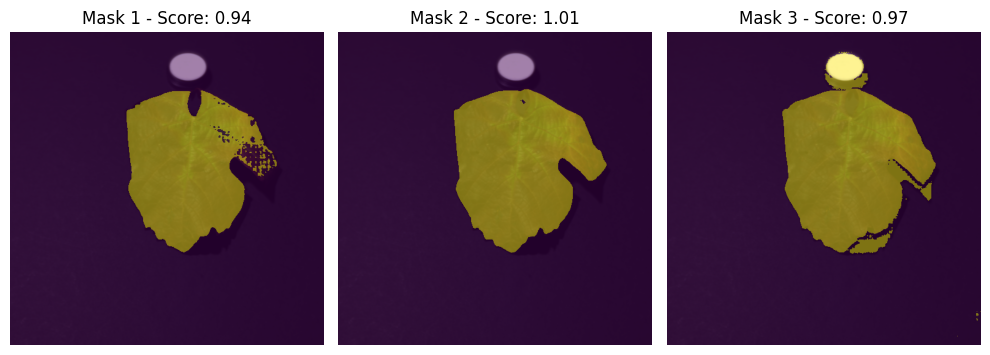

Saved cut image with transparency: hoja31.png


In [19]:
maskHoja('/home/dylanjitton/plant_disease/Dataset/Data/2020-09-10_005/results/REFLECTANCE_2020-09-10_005.png','hoja31')

In [ ]:
def maskHojaSmart(image_path, name):
    # Step 1: Load and crop the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    height = image.shape[0]
    crop_top = int(height * 0.2)
    image_cropped = image[crop_top:, :]

    
    predictor.set_image(image_cropped)

    input_point = np.array([[300, 300 - crop_top]])  # Adjust Y
    input_label = np.array([1])

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )

    # Heuristic selection of best mask
    h, w = masks[0].shape
    image_area = h * w
    selected_mask = None
    best_score = -1
    best_index = -1

    for i, mask in enumerate(masks):
        mask_area = np.sum(mask)
        proportion = mask_area / image_area
        if 0.05 < proportion < 0.4 and scores[i] > best_score:
            best_score = scores[i]
            selected_mask = mask
            best_index = i

    # Fallback if no suitable mask
    if selected_mask is None:
        print("⚠️ No suitable SAM mask found — using background remover fallback")

        # Reload image (cropped) and apply Rembg
        input_image = Image.fromarray(image_cropped).convert("RGBA")
        output_image = remove(input_image)

        output_path = f'{name}.png'
        output_image.save(output_path)
        print(f"✅ Saved with Rembg fallback: {output_path}")
        return

    print(f"✅ Selected SAM mask {best_index + 1} with score {scores[best_index]:.2f}")

    # Convert mask to uint8 and apply to cropped image
    mask_uint8 = (selected_mask * 255).astype(np.uint8)
    masked_image = image_cropped.copy()
    masked_image[selected_mask == 0] = 0

    # Merge with alpha
    rgba_image = np.dstack((masked_image, mask_uint8))
    # Optional: Visualize the 3 predicted masks
    plt.figure(figsize=(10, 10))
    for i, mask in enumerate(masks):
        plt.subplot(1, 3, i + 1)
        plt.imshow(image_cropped)
        plt.imshow(mask, alpha=0.5)
        plt.title(f"Mask {i+1} - Score: {scores[i]:.2f}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Save result
    output_path = f"{name}.png"
    Image.fromarray(rgba_image).save(output_path)
    print(f"✅ Saved cut image with transparency: {output_path}")

In [43]:
maskHojaSmart('/home/dylanjitton/plant_disease/Dataset/Data/2020-09-10_004/results/REFLECTANCE_2020-09-10_004.png','hoja310')

⚠️ No suitable SAM mask found — using background remover fallback
✅ Saved with Rembg fallback: hoja310.png


✅ Selected SAM mask 2 with score 1.01


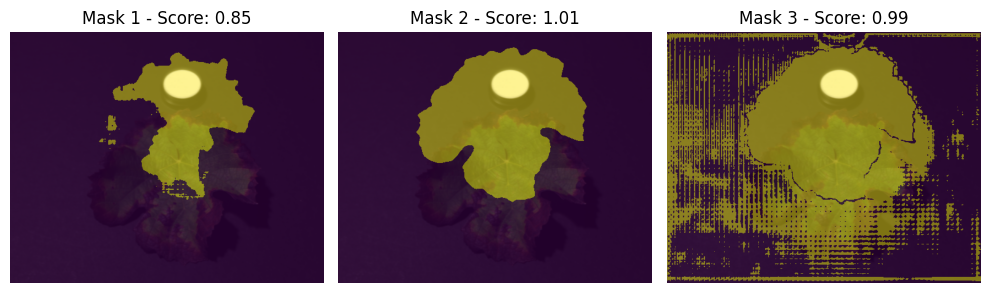

✅ Saved cut image with transparency: hojaRandom.png


In [45]:

maskHojaSmart('/home/dylanjitton/plant_disease/Dataset/Data/2020-09-10_023/results/REFLECTANCE_2020-09-10_023.png','hojaRandom')